In [2]:
from pymongo import MongoClient
import csv
from pathlib import Path
from IPython.display import Image

### Récupération données csv

In [3]:
def lire_csv_Dict(nom_fichier):
    data = []
    with open(nom_fichier, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(row)
        
    return data

In [4]:
def creation_db(db_name):
    
    #Creating a pymongo client
    client = MongoClient('localhost', 27017)
    #Getting the database instance
    db = client[db_name]
    return db


In [5]:
db_name = "Floupic"

#creation de la bdd floupic
db = creation_db(db_name)

#creation movies collection
movies = db["movies"]


In [6]:
#read  movies.csv file

repertoire_data = Path('data')
chemin_movies = repertoire_data / 'movies.csv'
movies = lire_csv_Dict(chemin_movies)

#insert all document (enregistrement*) in movies collection
db.movies.insert_many(movies)

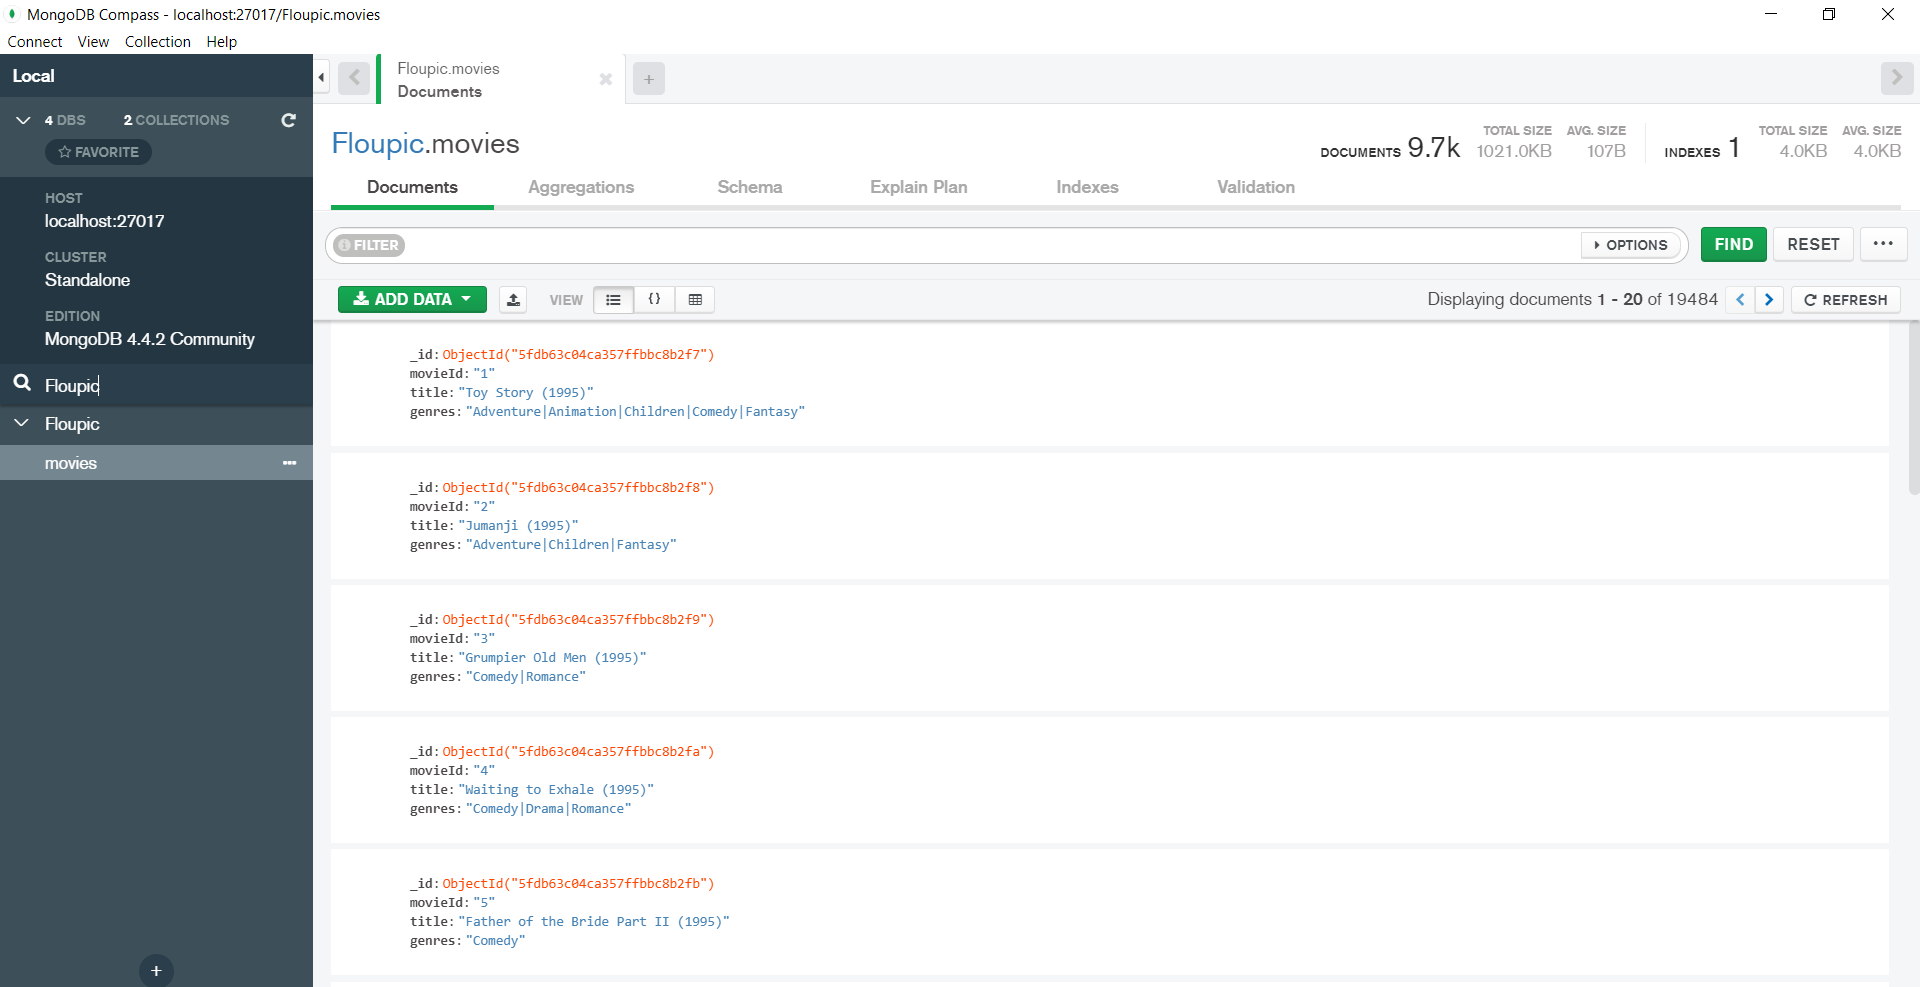

In [10]:
Image("img\MongoCompas.png")

In [6]:
#récupération des 5 premiers films d'action

for movie in db.movies.find({ "genres": "Action"}).limit(5):
    print(movie)


{'_id': ObjectId('5fdb63c04ca357ffbbc8b2ff'), 'movieId': '9', 'title': 'Sudden Death (1995)', 'genres': 'Action'}
{'_id': ObjectId('5fdb63c04ca357ffbbc8b336'), 'movieId': '71', 'title': 'Fair Game (1995)', 'genres': 'Action'}
{'_id': ObjectId('5fdb63c04ca357ffbbc8b3a3'), 'movieId': '204', 'title': 'Under Siege 2: Dark Territory (1995)', 'genres': 'Action'}
{'_id': ObjectId('5fdb63c04ca357ffbbc8b3ce'), 'movieId': '251', 'title': 'Hunted, The (1995)', 'genres': 'Action'}
{'_id': ObjectId('5fdb63c04ca357ffbbc8b522'), 'movieId': '667', 'title': 'Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996)', 'genres': 'Action'}
